In [27]:
# Sphere-Plane NN model
## https://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/

import matplotlib.pyplot as plt 
from math import exp
from math import sqrt

from random import seed
from random import random
from random import randint
import matplotlib.lines as lines 

import math
 
# Initialize a network


class neuron_s():
    
    def __init__(self, n_inputs,c,o):
        self.mode = "C"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]

        self.delta = 0
        self.output = 0
        self.R = .05 + 0.15*random()
        self.C = c
        self.al = 0.1
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs), self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.R = self.R
        return new_neuron
    
    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
 
        activation = 1 - (y3 -  2*y2 + y1 )/(self.R**2)
        return activation
        
    def transfer_l(self,activation):
        self.output = activation
        return self.output
    
    def transfer_derivative_l(self):
        return 1
    
    def transfer(self,activation):
        
        if  -self.al*activation > 100:
            self.output = 0
        else:
            self.output = 1.0 / (1.0 + exp(-self.al*activation)) 
        return self.output
    
    def transfer_derivative(self):
        return self.al*self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return 2*(self.weights[idx]-self.inputs[idx])/(self.R**2)

    def activation_derivate_by_weight(self, idx):
        return 2*(-self.weights[idx]+self.inputs[idx])/(self.R**2)

    def activation_derivate_by_R(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
        return 2*(y3 - 2*y2 +y1)  / (self.R**3) 
    
    def print_neuron_param(self):
        print(self.weights, self.R,self.C)
        
    def calculate_update(self, Ct, m_st):
        if self.output < .5 and self.C != Ct:
            return
        
        if self.output < .5 and m_st:
            return
        
        for j in range(len(self.weights)):
            self.dw[j] += ( self.delta * self.activation_derivate_by_weight(j))
        self.dR += self.delta*self.activation_derivate_by_R()
        #print(self.C,self.delta, self.activation_derivate_by_R(), self.delta*self.activation_derivate_by_R())
        

    def update_weights(self, l_rate):
        #print ("update weights")
        
        dH = sqrt(sum([x**2 for x in self.dw]) + self.dR**2 )*.5
        if dH < 0.000001:
            dH = 1

        #print ("update :", self.inputs)
        for j in range(len(self.weights)):
            #print ("   ", self.weights[j],self.dw[j]/dH ," == > " ,self.weights[j] + l_rate * self.dw[j]/dH)
            self.weights[j] -= l_rate * self.dw[j]/dH
            
        #print ("   ", self.R,self.dR/dH," == > " ,self.R + l_rate * self.dR/dH)
        self.R -= l_rate * self.dR/dH
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        cc = plt.Circle( (self.weights[0], self.weights[1] ), self.R ,fill = False,color=cl )   
        axes.add_artist( cc)    
        
        
class neuron_l():
    
    def __init__(self, n_inputs,c, o):
        self.mode = "L"
        self.C = c
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() -.5 for _ in range(n_inputs)]
        self.delta = 0
        self.output = 0
        self.A = random() - .5
        s1 = sqrt(sum([x**2 for x in self.weights]))
        self.weights = [x / s1 for x in self.weights]
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
    def copy (self):
        new_neuron = neuron_l(len(self.inputs),  self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.A = self.A
        return new_neuron

    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = (y1  - self.A) 
        #print (self.C,"activate    ", self.weights, self.A, ":", self.inputs,"==>", activation)
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-activation)) 
        #print (self.C,"transfer    ", activation,"==>", self.output)
        return self.output

    def transfer_derivative(self):
        return self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  self.inputs[idx]

    def activation_derivate_by_A(self):
        return -1
    
    def print_neuron_param(self):
        print(self.weights, self.A, self.C,":",self.inputs, self.output)

    def calculate_update(self, Ct, m_st):
        #print (self.C,"calc_delta    ",self.dw, self.dA ,"==>", )
        for j in range(len(self.weights)):
            self.dw[j] = self.delta * self.activation_derivate_by_weight(j)
        self.dA =  self.delta*self.activation_derivate_by_A()
        #print (self.C,"          ==>",self.dw, self.dA  )

        
        
    def update_weights(self, l_rate):
        #print (self.C,"update    ", self.weights,self.A)
        for j in range(len(self.weights)):
            self.weights[j] -=  l_rate * self.dw[j]
        self.A -= l_rate * self.dA
        #print (self.C,"        ==>", self.weights,self.A)

        s1 = sqrt(sum([x**2 for x in self.weights]))
        self.weights = [x / s1 for x in self.weights]
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        x1 = -2
        y1 = (self.A - self.weights[0]*x1) / self.weights[1]
        x2 = 8
        y2 = (self.A - self.weights[0]*x2) / self.weights[1]
        
        line   = plt.Line2D([x1,x2],[y1,y2],color = cl)
        #print ("line",[x1,x2],[y1,y2],"w",self.weights)
        plt.gca().add_line(line)    
        
        
class SSNN_network():
    
    def __init__ (self):
        self.layers = []
        self.HL = 0
        self.OL = 0
        self.outputs = []
        self.tr_stat = [-1]

    def init (self, n_inputs, hidden_nmode, outputs_nmode):
        self.layers = []
        n_outputs = len(outputs_nmode)
        n_hiddens = len(hidden_nmode)
        self.outputs = [outputs_nmode[i][1] for i in range(len(outputs_nmode))]
        self.HL = -1
        self.OL = 0
        self.layers.append([])
        if n_hiddens > 0:
            self.layers.append([])
            self.HL = 0
            self.OL = 1
            for i in range(n_hiddens):
                if hidden_nmode[i][0] == 'S': 
                    self.layers[self.HL].append(neuron_s(n_inputs,hidden_nmode[i][1],False))
                else:
                    self.layers[self.HL].append(neuron_l(n_inputs,hidden_nmode[i][1],False))
            for i in range(n_outputs):
                if outputs_nmode[i][0] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_hiddens,outputs_nmode[i][1],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_hiddens,outputs_nmode[i][1],True))
        else:
            for i in range(n_outputs):
                if outputs_nmode[i][0] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_inputs,outputs_nmode[i][1],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_inputs,outputs_nmode[i][1],True))
                    
                    
                    
    def copy(self):
        new_network = SSNN_network()
        new_network.outputs = self.outputs.copy()
        new_network.HL = self.HL
        new_network.OL = self.OL
        new_network.HL = self.HL
        for i in range(len(self.layers)):
            new_network.layers.append([])            
            for neuron in self.layers[i]:
                new_network.layers[i].append(neuron.copy())
        return new_network
        
    def forward_propagate(self, row):
        for neuron in self.layers[0]:
            for i in range(len(row)-1):
                neuron.inputs[i] = row[i]

        m_status = False 
                
        for l in range(len(self.layers)):
            layer = self.layers[l]
            for neuron in layer:
                activation = neuron.activate()
                neuron.transfer(activation)
                if neuron.mode == 'C':
                    if neuron.output > .5 and neuron.C == row[-1]:
                        m_status = True
            if l < self.OL:
                for neuron in self.layers[l+1]:
                    for i in range(len(self.layers[l])):
                        neuron2 = self.layers[l][i]
                        neuron.inputs[i] = neuron2.output

        outputs = []
        for neuron in self.layers[self.OL]:
            outputs.append(neuron.output)
        return (outputs, m_status)
     
    
    def backward_propagate_error(self, expected):
        for lv in reversed(range(len(self.layers))):
            layer = self.layers[lv]
            if lv != self.OL:
                for j in range(len(layer)):
                    neuron = layer[j]
                    error = 0.0
                    for q in range(len(self.layers[lv + 1])):
                        neuron_out = self.layers[lv + 1][q]
                        error += (neuron_out.activation_derivate_by_input(j) * neuron_out.delta)
                    
                    neuron.delta = error * neuron.transfer_derivative()
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    neuron.delta = -(expected[j] - neuron.output) * neuron.transfer_derivative()
                #print("prop error",neuron.delta, errors[j] , neuron.transfer_derivative())
                
    def test_update_weights(self, l_rate, train):
        #print ("Update weights test")
        acc = self.test_network(train)
        err = self.get_error(train)
        X = [0]
        YE = [err]
        YA = [acc]
        #print ("base:",acc,err)
        for l in [0.1 + 0.1*x for x in range(20)]:
            networks = self.copy()
            networks.update_weights(l)
            acc = networks.test_network(train)
            err = networks.get_error(train)
            #print (l,":",acc,err)
            X.append(l)
            YE.append(err)
            YA.append(acc)

        plt.plot(X,YE)
        plt.show()
        plt.plot(X,YA)
        plt.show()
                
            
    def get_error(self, train):
        train = self.normalize(train) 
        sum_error = 0
        n_outputs = len(self.outputs)
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        return sum_error

    def test_network(self, train):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        dbok = 0
        self.tr_stat = [0 for _ in range(len(train))]
        #print("test")
        for i in range(len(train)):
            row = train[i]
            (voutputs,_) = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            idx = voutputs.index(max(voutputs))
            if self.outputs[idx] == row[-1]:
                dbok += 1
                self.tr_stat[i] = 1
            #print (row, voutputs, self.tr_stat[i])
        #print ("accuray:", dbok / len(train))
        return dbok / len(train)
    
    def calculate_update(self, C, m_st):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.calculate_update(C, m_st);
    
    def update_weights(self, l_rate):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.update_weights(l_rate);

    def train_network(self, train, l_rate, n_epoch, drf = 5):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        #print ("INDULO -----------------------------------------------------------")
        acc = self.test_network (T)
        #print ("inti acc:", acc)
        self.draw_network( train)
        self.print_network_param()
        #print ("-----------------------------------------------------------")
        min_error = 100000000
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train:
                                     
                #print ("forward_propagate -----------------", row)
                (voutputs, cst)  = self.forward_propagate( row)
                
                expected = [0 for i in range(n_outputs)]
                for i in range(n_outputs):
                    if self.outputs[i] == row[-1]:
                        expected[i] = 1
                sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
                
                #print ("backward_propagate -----------------", expected)
                self.backward_propagate_error( expected)
                
                #if random() < 0.1:
                #    self.test_update_weights(l_rate,train)

                #print ("calculate update -----------------", cst)
                self.calculate_update(row[-1], cst)
                
            #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
            
            if sum_error < min_error:
                min_error = sum_error
                winner_network = network.copy()
                
            #if epoch % drf == 0:
            #print ("update weights -----------------------------------")
            self.update_weights(l_rate)
            
            #self.draw_network( train)
            #self.print_network_param()
        sum_error = 0
        for row in train:
            (voutputs, _) = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        if sum_error < min_error:
            min_error = sum_error
            winner_network = network.copy()
        
        #print ("ZARO -----------------------------------------------------------")
        acc = winner_network.test_network (T)
        winner_network.draw_network( train)
        self.print_network_param()
        #print ("----------------------------------------------------------------")
        print ("min error:", min_error)
        print ("accuracy:",acc)
              
        return winner_network
            
    def draw_network (self, train):
        
        if self.OL == 0:
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[self.OL])):
                sn = self.layers[self.OL][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)        
                if self.tr_stat[0]> -1:
                    if self.tr_stat[i] == 1:
                        cc = plt.Circle( (train[i][0], train[i][1] ), 0.05 ,fill = True, color ="green" )   
                        axes.add_artist( cc)        

            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
        if self.OL == 1:
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[0])):
                sn = self.layers[0][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)   
                if self.tr_stat[0]> -1:
                    if self.tr_stat[i] == 1:
                        cc = plt.Circle( (train[i][0], train[i][1] ), 0.05 ,fill = True, color ="green" )   
                        axes.add_artist( cc)        
                    
            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
            
            '''
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[1])):
                sn = self.layers[1][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)        
            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
            '''
            
                
    def print_network_param(self):
        for layer in self.layers:
            print ("Layer ---------------")
            for neuron in layer:
                neuron.print_neuron_param()
            
    def normalize (self, train):
        mx = []
        mn = []
        for i in range(len(train[0])-1):
            mx.append(max([x[i] for x in train ]))
            mn.append(min([x[i] for x in train ]))
        for row in train:
            for i in range(len(row)-1):
                row[i] = (row[i] - mn[i]) / (mx[i] - mn[i]) 
        return train
    
        
    

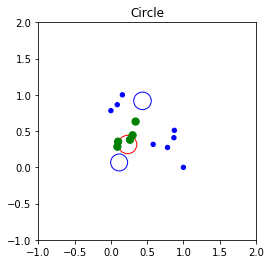

Layer ---------------
[0.2299831314947146, 0.3147830449816452] 0.12680880589765275 0
[0.11368634577199777, 0.06701920683191931] 0.11688781830405587 1
[0.4353612630867718, 0.9169425014300254] 0.12117524414215348 1
Layer ---------------
[-0.6240993977360062, 0.6119671952031495, -0.48579429158929466] -0.34609027383995794 0 : [0.05457274664527122, 0.0018599843303863436, 0.3843523748718847] 0.5315713199427924
[-0.5278451249800525, -0.504182319629265, -0.6835054590916202] 0.478973458174608 1 : [0.05457274664527122, 0.0018599843303863436, 0.3843523748718847] 0.31617111800594166


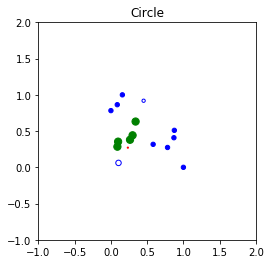

Layer ---------------
[0.23354981401686967, 0.271218221206362] -0.00833479035951811 0
[0.10449083111195856, 0.06110062770614966] 0.03765776937725007 1
[0.45095180293030984, 0.9186842014469787] 0.02257352768514063 1
Layer ---------------
[-0.623730496556252, 0.6115062931756788, -0.4868473282993674] -0.31799475273686756 0 : [0, 9.100620283926363e-28, 1.454302950073253e-08] 0.5788354787158528
[-0.5283267700237357, -0.5047441815777678, -0.6827181960660461] 0.44978711794105647 1 : [0, 9.100620283926363e-28, 1.454302950073253e-08] 0.3894113794988945
min error: 7.300703567152275
accuracy: 0.38461538461538464


In [28]:
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]

#seed(1966)

n_inputs = len(T[0]) - 1
network = SSNN_network()
# CASE 1:  network.init(n_inputs, [],['S','S'],[0,1])
network.init(n_inputs, [('S',0),('S',1),('S',1)],[('L',0),('L',1)])
#network = set_network_1(network)
#network.print_network_param()
winner = network.train_network( T, 0.01, 20,10)
    

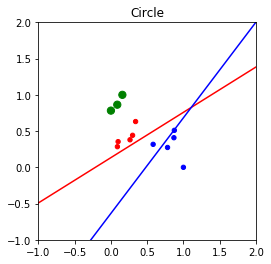

Layer ---------------
[0.5298280272124165, -0.8481051005507506] -0.11358498749360868 0 : [0.15794320789612293, 1.0] 0.34280086164517315
[-0.7967635273169851, 0.6042912224560241] -0.383778871468885 1 : [0.15794320789612293, 1.0] 0.7031256671087152


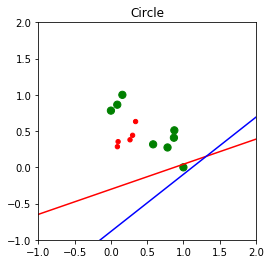

Layer ---------------
[-0.14725262515324944, -0.9890989153696796] 4.27125465362097 0 : [0.15794320789612293, 1.0] 0.005048458318264243
[0.13287631380845802, 0.9911326274665143] -4.273334678548941 1 : [0.15794320789612293, 1.0] 0.9949607910613767
min error: 6.639459250195044
accuracy: 0.6153846153846154


In [55]:
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]

#T = [[2.7810836,2.550537003,0],
#    [1.93756466,7.108563011,1] 
#    ]
#seed(1974)

n_inputs = len(T[0]) - 1
network = SSNN_network()
# CASE 1:  network.init(n_inputs, [],['S','S'],[0,1])
network.init(n_inputs, [],[('L',0),('L',1)])
#network = set_network_1(network)
#network.print_network_param()
opt_nw = network.train_network( T, .2, 100000,10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0.49772093 0.30008778]
 [0.55981374 0.38526177]
 [0.5937693  0.24317667]
 [0.52782154 0.39809352]
 [0.51401126 0.27795961]
 [0.25586522 0.09843415]
 [0.3251114  0.17784879]
 [0.23354036 0.12395477]
 [0.10243258 0.08958042]
 [0.2966592  0.0932295 ]
 [0.79015195 0.3907917 ]
 [0.79190683 0.33683774]
 [0.81656784 0.28947067]]
acc =  0.38461538461538464


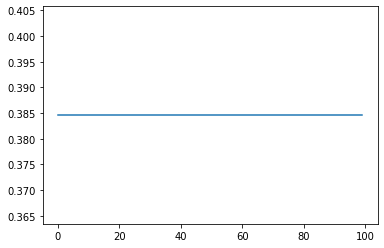

In [66]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt


T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]

N = len(T)
M = len(T[0])-1
X_train = np.zeros((N,M),dtype='float32')
y_train = np.zeros((N,2))

for i in range(N):
    row = T[i]
    for j in range(M):
        X_train[i,j] = row[j]
    if row[-1] == 1:
        y_train[i,1] = 1
    else:
        y_train[i,0] = 1

model = Sequential()
model.add(Dense(2, input_dim=M, activation='sigmoid'))
#model.add(Dense(4, activation=’softmax’))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


history = model.fit(X_train, y_train, epochs=100, verbose=0)

plt.plot(history.history['acc'])

y_pred = model.predict(X_train)
db = 0
for i in range(N):
    if (y_pred[i,0] > y_pred[i,1]) and (y_train[i,0] >  y_train[i,1]):
        db = db + 1
    if (y_pred[i,0] < y_pred[i,1]) and (y_train[i,0] <  y_train[i,1]):
        db = db + 1
print (y_train)
print (y_pred)
print ("acc = ", db/N)
